# <b>A. <span style='color:#0B2F9F'><code>SUB-QUERY</code></span></b>
Subquery adalah sebuah query (pernyataan SQL) yang terletak di dalam query lain. Subquery dapat digunakan untuk mengambil data yang kemudian akan digunakan oleh query utama.<br><br>

#### <i><b><span style='color:#55679C'>Quest</span> : Pada tabel customer_demography, hitung rata-rata umur customer dan bulatkan ke dua tempat desimal!</b></i>

In [ ]:
SELECT
ROUND(AVG(age),2) as avg_age,
FROM`telco_churn.customer_demography`

avg_age
46.51


Konteks **Sub-query** disini adalah penggunaan 2 Syntax dalam 1 baris/data, yang mana data rata-rata umur pelanggan dibulatkan sampai ke 2 tempat desimal "ROUND(AVG(age),2) -> angka dibelakang menunjukkan berapa angka setelah koma yang akan ditunjukkan

#### <i><b><span style='color:#55679C'>Quest</span> : Pada tabel customer_demography, tampilkan customer_id, age dan gendernya dimana umur customer tersebut lebih dari rata-rata umur customer secara keseluruhan!</b></i>

In [ ]:
SELECT
  customer_id,
  gender,
  age,
  senior_citizen,
  married,
  number_of_dependents
FROM`telco_churn.customer_demography`
WHERE age > (SELECT ROUND(AVG(age),2) AS avg_customer_age FROM `telco_churn.customer_demography`)
ORDER BY age DESC

customer_id,gender,age,senior_citizen,married,number_of_dependents
4827-LTQRJ,Female,70,Yes,Yes,2
8809-XKHMD,Male,62,No,Yes,0
3768-NLUBH,Male,73,Yes,Yes,0
8807-ARQET,Female,59,No,No,0
5546-BYZSM,Female,52,No,No,0
...,...,...,...,...,...


Penulisan **SUBQUERY** biasanya seperti menulis Query baru, sehingga menggunakan *Syntax* **SELECT**. Penggunaan **SUBQUERY** sendiri bisa digunakan setelah *Syntax* **SELECT, WHERE, FROM**

#### <i><b><span style='color:#55679C'>Quest</span> : Pada tabel customer_demography, ada berapa customer yang lebih dari rata-rata umur customer secara keseluruhan?</b></i>

In [ ]:
SELECT
  count(1) as total_customer
FROM `telco_churn.customer_demography`
WHERE age > (SELECT ROUND(AVG(age),2) FROM `telco_churn.customer_demography`)

total_customer
3452


Penggunaan *Syntax* : COUNT(1) digunakan untuk mengitung jumlah baris yang ada dalam hasil query, tanpa memperhatikan nilai kolom yang dihitung. Dengan kata lain, COUNT(1) akan menghitung setiap baris yang ditemukan dalam hasil query, terlepas dari kolom yang dipilih atau nilainya.

#### <i><b><span style='color:#55679C'>Quest</span> : Pada tabel customer_demography, berapa usia termuda dan tertua customer yang lebih dari rata-rata umur customer secara keseluruhan?</b></i>

In [ ]:
SELECT
  MIN(age) AS min_age,
  MAX(age) AS max_age
FROM `telco_churn.customer_demography`
WHERE age > (SELECT ROUND(AVG(age),2) FROM telco_churn.customer_demography)

min_age,max_age
47,80


Secara struktur, penggunaan *Syntax* **WHERE** dilakukan untuk mengeliminasi data-data yang lebih besar daripada rata-rata umur customer, sebelum pada akhirnya ditarik nilai terendah (MIN) dan tertinggi (MAX)

#### <i><b><span style='color:#55679C'>Quest</span> : Pada tabel customer_status, tampilkan semua data dengan cltv kurang dari atau sama dengan rata-rata cltv customer secara keseluruhan dan statusnya selain Churned?</b></i>

In [ ]:
SELECT
*
FROM `telco_churn.customer_status`
WHERE cltv <= (SELECT ROUND(AVG(cltv),2) FROM telco_churn.customer_status) AND status <> "Churned"

customer_id,satisfaction_score,status,churn_label,churn_score,cltv,churn_category,churn_reason
6867-ACCZI,3,Stayed,No,47,3303,nan,nan
3016-KSVCP,3,Stayed,No,62,3664,nan,nan
3948-FVVRP,4,Stayed,No,73,2848,nan,nan
6047-SUHPR,3,Stayed,No,58,3093,nan,nan
6522-OIQSX,4,Stayed,No,23,4175,nan,nan
...,...,...,...,...,...,...,...


Selain menggunakan [status <> "Churned] ; bisa digunakan juga *Syntax* [status NOT IN ("Churned")]

#### <i><b><span style='color:#55679C'>Quest</span> : Pada tabel customer_status, Hitung besarnya presentase setiap status yang ada dan juga jumlah customer tiap statusnya!</b></i>

In [ ]:
SELECT
  status,
  COUNT(customer_id) AS total_customer,
  ROUND(100 * COUNT(customer_id)/(SELECT COUNT(customer_id) FROM telco_churn.customer_status), 2) AS persentase
FROM telco_churn.customer_status
GROUP BY status;

status,total_customer,percentage
Churned,1869,26.54
Joined,454,6.45
Stayed,4720,67.02


Penggunaan *Syntax* **GROUP BY status** akan mengelompokan secara otomatis data-data yang berbeda dari setiap statusnya

# <b>B. <span style='color:#0B2F9F'><code>CTE</code></span></b>
CTE, atau Common Table Expression, adalah fitur dalam SQL yang memungkinkan Anda untuk mendefinisikan sebuah query sementara yang dapat digunakan dalam query lain. CTE membantu dalam membuat query lebih mudah dibaca dan dipelihara, serta memungkinkan penggunaan rekursi dalam query.

<img src="https://learnsql.com/blog/sql-common-table-expression-guide/cte_syntax_example.webp" width="50%">

#### <i><b><span style='color:#55679C'>Quest</span> : Hitung jumlah customer pada masing - masing offer & jenis contract!</b></i>

In [ ]:
SELECT
  offer,
  contract,
  COUNT(customer_id) as jumlah_customer
FROM telco_churn.telco_services
WHERE offer IS NOT NULL
GROUP BY offer, contract
ORDER BY offer ASC, contract ASC


offer,contract,total_customer
Offer A,Month-to-Month,15
Offer A,One Year,97
Offer A,Two Year,408
Offer B,Month-to-Month,216
Offer B,One Year,317
Offer B,Two Year,291
Offer C,Month-to-Month,203
Offer C,One Year,143
Offer C,Two Year,69
Offer D,Month-to-Month,434


#### <i><b><span style='color:#55679C'>Quest</span> : Tampilkan kolom offer & jenis contract dimana jumlah customernya paling besar (saja)!</b></i>

In [ ]:
WITH temp_offer AS (
    SELECT
      offer,
      contract,
      COUNT(customer_id) AS total_customer
    FROM telco_churn.telco_services
    GROUP BY offer, contract
)
  SELECT * FROM temp_offer
  WHERE total_customer = (SELECT MAX(total_customer) FROM temp_offer)

offer,contract,total_customer
nan,Month-to-Month,2020


Secara penulisan *SYNTAX*; perhatikan bahwa *Syntax* **WITH** digunakan untuk membuat table dari query yang sebelumnya dipakai. Sehingga pada Query Utama hanya tinggal mencari jumlah terbesar dari total_customernya

Atau apabila tidak menggunakan CTE, maka bisa menggunakan
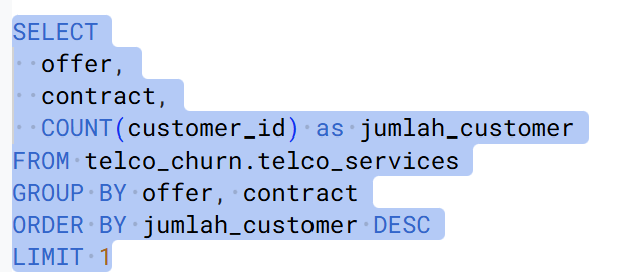

#### <i><b><span style='color:#55679C'>Quest</span> : Tampilkan customer_id, gender, age, tenure_in_month, total_revenue dan status dengan status = 'Churned' dan internet_type-nya = 'Fiber Optic'! (Terapkan CTE untuk mengoptimasi query ini)!</b></i>

In [ ]:
WITH demo_cte AS (
  SELECT customer_id, gender, age
  FROM telco_churn.customer_demography)
  ,
  services_cte AS (
    SELECT customer_id, tenure_in_months, total_revenue, internet_type
    FROM `telco_churn.telco_services`
    WHERE internet_type = "Fiber Optic"
  )
  ,
  status_cte AS (
    SELECT customer_id, status
    FROM `telco_churn.customer_status`
    WHERE status = "Churned"
  )

SELECT
  a.customer_id,
  a.gender,
  a.age,
  b.tenure_in_months,
  b.total_revenue,
  b.internet_type,
  c.status
FROM demo_cte a
JOIN services_cte b ON a.customer_id = b.customer_id
JOIN status_cte c ON a.customer_id = c.customer_id

customer_id,gender,age,tenure_in_months,total_revenue,status
7495-OOKFY,Female,74,8,1024.1,Churned
1658-BYGOY,Male,71,18,1910.88,Churned
4598-XLKNJ,Female,78,25,2995.07,Churned
4846-WHAFZ,Female,80,37,3102.36,Churned
4412-YLTKF,Female,72,27,2235.41,Churned
...,...,...,...,...,...


Penulisan CTE query diatas harus dihubungkan dengan nama *column* data yang sama, yaitu **customer_id**. Sehingga setelah terhubung, digunakan Syntas **JOIN** untuk menghubungkan dari 3 Table yang berbeda: [**customer_status , customer_demography , dan telco_services**].

Selain itu penggunaan CTE dilakukan untuk langsung menyaring data status: "**Churned**" dan internet_type: "**Fiber Optic**"


---
Powered by : <br>
<img src="https://lh3.googleusercontent.com/ayfbbgvQolM_Ys9VYRVFD6FjDJXSebI9sN1VtY4ppp65dXepA6JCKgKMM_porWAErGQmc8l-L_RXq080SJ3FbYTIsyxYqWWTuAX8A3VtafWLUwAnnxNnjR1s-3BMCUlF34fYnViLuutxrLm3nEpoix0" width="20%">
<br><br>
<a href="https://www.linkedin.com/in/kennynathane/"><img src="https://img.shields.io/badge/-© 2025 Kenny Nathane-417DAC?style=for-the-badge&logoColor=white"/></a>